In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

df = pd.read_csv('used_car_data.csv')
df.info()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6019 entries, 0 to 6018
Data columns (total 12 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   Name               6019 non-null   object 
 1   Location           6019 non-null   object 
 2   Year               6019 non-null   int64  
 3   Kilometers_Driven  6019 non-null   int64  
 4   Fuel_Type          6019 non-null   object 
 5   Transmission       6019 non-null   object 
 6   Owner_Type         6019 non-null   object 
 7   Mileage            6017 non-null   object 
 8   Engine             5983 non-null   object 
 9   Power              5983 non-null   object 
 10  Seats              5977 non-null   float64
 11  Price              6019 non-null   float64
dtypes: float64(2), int64(2), object(8)
memory usage: 376.2+ KB


In [2]:
#1.Merek mobil apa saja yang tersedia dan ada berapa banyak mobil untuk tiap merek tersebut? 
merkMobil = df['Name'].str.upper().str.split(' ')
#print(merkMobil)
df['Brand'] = merkMobil.apply(lambda x: x[0])
#df[df['Brand']=='LAND'] = 'LAND ROVER'
df['Brand'].value_counts()

MARUTI           1211
HYUNDAI          1107
HONDA             608
TOYOTA            411
MERCEDES-BENZ     318
VOLKSWAGEN        315
FORD              300
MAHINDRA          272
BMW               267
AUDI              236
TATA              186
SKODA             173
RENAULT           145
CHEVROLET         121
NISSAN             91
LAND               60
JAGUAR             40
FIAT               28
MITSUBISHI         27
MINI               26
VOLVO              21
PORSCHE            18
JEEP               15
DATSUN             13
FORCE               3
ISUZU               3
LAMBORGHINI         1
AMBASSADOR          1
SMART               1
BENTLEY             1
Name: Brand, dtype: int64

In [ ]:
df['Brand'].value_counts().plot.bar()
plt.savefig('grafik1.png')

In [ ]:
print(df[df['Owner_Type']=='First'].shape)
#Row asli 6019

In [ ]:
#2. Kota apa yang memiliki mobil bekas paling banyak? 
df['Location'].value_counts()

In [ ]:
sns.countplot(x='Location',data=df)
plt.xticks(rotation=45)

In [ ]:
df['Year'].unique()

In [ ]:
#3. Bagaimana distribusi tahun edisi mobil-mobil bekas tersebut? 
df['Year'].plot.kde()

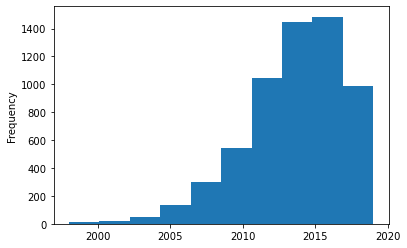

In [39]:
df['Year'].plot.hist()

In [ ]:
df['Year'].unique().sort()

In [ ]:
sns.countplot(y='Year',data=df)
#plt.xticks(rotation=90)

In [ ]:
#4.Berapa banyak mobil yang memiliki total jarak pemakaian di bawah 100.000 kilometer?
df[df['Kilometers_Driven']<100000].shape

In [ ]:
#5.Pada batas berapa kilometer total jarak pemakaian bisa dikategorikan sebagai rendah 
#atau tinggi? Sertakan argumen yang mendukung jawaban. 
rataRata = df['Kilometers_Driven'].mean()
variansi = np.var(df['Kilometers_Driven'],ddof=0) 
#df['']
print(variansi)
print(rataRata)

In [ ]:
outlier = df['Kilometers_Driven'].max()
#print(outlier)
drop = df[df['Kilometers_Driven']==outlier]
df = df.drop(drop.index)


In [ ]:
df['Kilometers_Driven'].describe()

In [ ]:
plt.figure(figsize=(16,7))
sns.boxplot(x=df["Kilometers_Driven"])

In [ ]:
drop2 = df[df['Kilometers_Driven']>400000]
df = df.drop(drop2.index)
df['Kilometers_Driven'].describe()

In [ ]:
rataRata = df['Kilometers_Driven'].mean()
std = df['Kilometers_Driven'].std()
print(std)
print(rataRata)

In [ ]:
df['Kilometers_Driven'].plot.hist()
plt.axvline(rataRata+std,color='red',label='Batas Atas')
plt.axvline(rataRata-std,color='red',label='Batas Bawah')
plt.axvline(rataRata,color='yellow',label='Rata Rata')
plt.legend()

In [ ]:
#6.Apakah terdapat outlier pada kolom Kilometers_Driven? Sertakan argumen yang         mendukung jawaban. 
#yak ada

In [ ]:
#7.Apakah tahun pembuatan mobil berpengaruh terhadap total jarak pemakaian? Sertakan argumen yang mendukung jawaban
sns.scatterplot(x=df['Kilometers_Driven'], y=df['Year'])

In [ ]:
year_km = df.loc[:,['Kilometers_Driven', 'Year']]
year_km.corr()

In [ ]:
sns.regplot(x=df['Kilometers_Driven'], y=df['Year'])

Moderate korelasi

In [ ]:
#8. Berapa banyak mobil yang merupakan kepemilikan ketiga atau lebih? 
df_bekas_lagi_tapi_beda = df.loc[df.Owner_Type.isin(['Third', 'Fourth & Above'])]
df_bekas_lagi_tapi_beda.shape

In [ ]:
df.info()

In [3]:
#9.Tipe bahan bakar apa yang memiliki mileage (konsumsi bahan bakar) paling hemat? 
#df = df[df['Mileage'].notnull()]
stringMil = df['Mileage'].astype(str)
satuan = stringMil.str.split(' ')
df['konsumsiBensin'] = satuan.apply(lambda x:x[0])
df['konsumsiBensin'] = df['konsumsiBensin'].astype(float)
df.head()

,Name,Location,Year,Kilometers_Driven,Fuel_Type,Transmission,Owner_Type,Mileage,Engine,Power,Seats,Price,Brand,konsumsiBensin
0,Maruti Wagon R LXI CNG,Mumbai,2010,72000,CNG,Manual,First,26.6 km/kg,998 CC,58.16 bhp,5.0,1.75,MARUTI,26.60
1,Hyundai Creta 1.6 CRDi SX Option,Pune,2015,41000,Diesel,Manual,First,19.67 kmpl,1582 CC,126.2 bhp,5.0,12.50,HYUNDAI,19.67
2,Honda Jazz V,Chennai,2011,46000,Petrol,Manual,First,18.2 kmpl,1199 CC,88.7 bhp,5.0,4.50,HONDA,18.20
3,Maruti Ertiga VDI,Chennai,2012,87000,Diesel,Manual,First,20.77 kmpl,1248 CC,88.76 bhp,7.0,6.00,MARUTI,20.77
4,Audi A4 New 2.0 TDI Multitronic,Coimbatore,2013,40670,Diesel,Automatic,Second,15.2 kmpl,1968 CC,140.8 bhp,5.0,17.74,AUDI,15.20


In [ ]:
grupBensin = df.groupby('Fuel_Type').mean()
grupBensin['konsumsiBensin'].sort_values(ascending=False)

In [ ]:

plt.figure(figsize=(16,7))
sns.barplot(x='Fuel_Type',y='konsumsiBensin',data=df,order=['CNG','LPG','Diesel','Petrol'])


In [ ]:
sns.boxplot(x='Fuel_Type',y='konsumsiBensin',data=df,order=['CNG','LPG','Diesel','Petrol'])

In [ ]:
#10.Apa saja faktor-faktor yang mempengaruhi harga mobil bekas di India? Sertakan argumen yang mendukung jawaban
df.corr()

In [ ]:
df.info()

In [ ]:
harga = df.groupby('Year').mean()
harga['Price']

In [ ]:
harga.plot.bar()

In [ ]:
sns.scatterplot(x=df['Price'], y=df['Brand'])


In [ ]:
grupMerk = df.groupby('Brand').mean()
grupMerk['Price'].sort_values(ascending=False)

In [ ]:
sns.barplot(x=df['Brand'],y=df['Price'],data=df)
plt.xticks(rotation=90)

In [ ]:
plt.figure(figsize=(16,7))
sns.boxplot(x=df["Price"])

In [ ]:
mahal = df[df['Price']>=100]
mahal

In [ ]:
df.head()

In [14]:
grupLokasi = df.groupby('Location').mean()
hargaLokasi = grupLokasi['Price'].sort_values(ascending=False)
hargaLokasi.index

Index(['Coimbatore', 'Bangalore', 'Kochi', 'Hyderabad', 'Delhi', 'Mumbai',
       'Ahmedabad', 'Chennai', 'Pune', 'Jaipur', 'Kolkata'],
      dtype='object', name='Location')

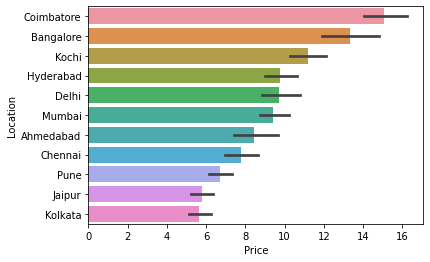

In [15]:
sns.barplot(y='Location',x='Price',data=df,order=hargaLokasi.index)
#plt.xticks(rotation=)

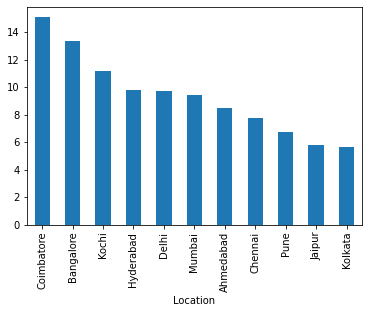

In [12]:
hargaLokasi.plot.bar()

In [ ]:
grupFuel = df.groupby('Fuel_Type').mean()
grupFuel['Price'].sort_values(ascending=False)

In [ ]:
df['Brand'].unique()

In [ ]:
diesel = df[df['Fuel_Type']=='Diesel']
sns.countplot(y='Brand',data=diesel)


In [ ]:
petrol=df[df['Fuel_Type']=='Petrol']
sns.countplot(y='Brand',data=petrol)

In [ ]:
cng=df[df['Fuel_Type']=='CNG']
sns.countplot(y='Brand',data=cng)

In [ ]:
lpg=df[df['Fuel_Type']=='LPG']
sns.countplot(y='Brand',data=lpg)

In [ ]:
sns.countplot(x='Fuel_Type',data=df)

In [ ]:
sns.countplot(y='Brand',data=df)


In [ ]:
df.head()

In [17]:
grupTransmisi = df.groupby('Transmission').mean()
grupTransmisi['Price']

Transmission
Automatic    19.843971
Manual        5.332703
Name: Price, dtype: float64

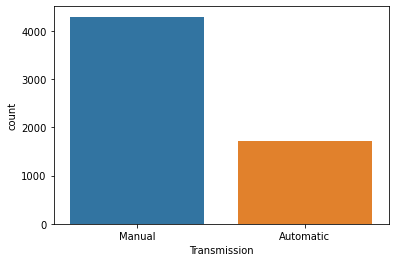

In [18]:
sns.countplot(x='Transmission',data=df)

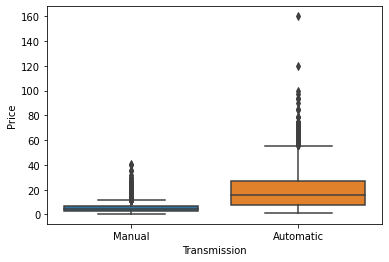

In [19]:
sns.boxplot(x = 'Transmission', y = 'Price', data = df)
plt.show()

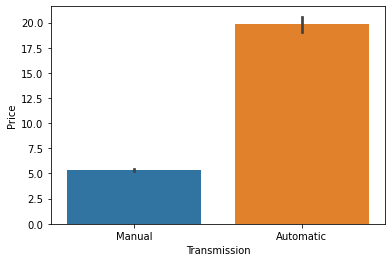

In [20]:
sns.barplot(x = 'Transmission', y = 'Price', data = df)

In [ ]:
#Kita hilangkan outlier di harga
outlierHarga = df[df['Price']>100]
dfCopy = df.copy()
dfCopy.head()

In [ ]:
dfCopy = dfCopy.drop(outlierHarga.index)

In [ ]:
sns.boxplot(x = 'Transmission', y = 'Price', data = dfCopy)
plt.show()

In [ ]:
dfCopy[(dfCopy['Price']<=100)&(dfCopy['Price']>=60)]

In [ ]:
grup = dfCopy.groupby('Transmission').mean()
grup['Price']

In [ ]:
auto = df[df['Transmission']=='Automatic']
sns.set(style="darkgrid")
sns.countplot(x='Year',data=auto, palette="Set3")
plt.xticks(rotation=45)

In [ ]:
manual = df[df['Transmission']=='Manual']
sns.set(style="darkgrid")
sns.countplot(x='Year',data=manual, palette="Set3")
plt.xticks(rotation=45)

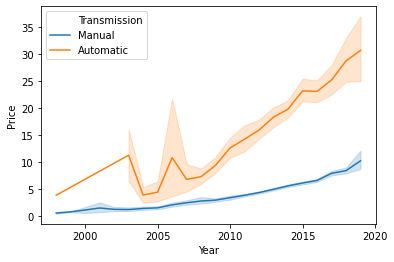

In [4]:
sns.lineplot(x='Year',y='Price',hue='Transmission',data=df)

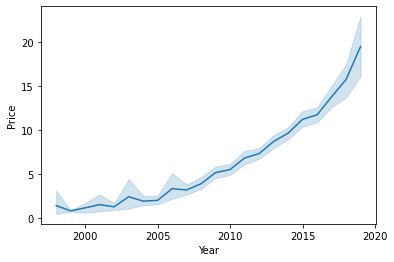

In [5]:
sns.lineplot(x='Year',y='Price',data=df)

In [ ]:
df.head()

In [4]:
stringEng = df['Engine'].astype(str)
mesin = stringEng.str.split(' ')
df['Mesin'] = mesin.apply(lambda x:x[0])
df['Mesin']= df['Mesin'].astype(float)
df.head()

,Name,Location,Year,Kilometers_Driven,Fuel_Type,Transmission,Owner_Type,Mileage,Engine,Power,Seats,Price,Brand,konsumsiBensin,Mesin
0,Maruti Wagon R LXI CNG,Mumbai,2010,72000,CNG,Manual,First,26.6 km/kg,998 CC,58.16 bhp,5.0,1.75,MARUTI,26.60,998.0
1,Hyundai Creta 1.6 CRDi SX Option,Pune,2015,41000,Diesel,Manual,First,19.67 kmpl,1582 CC,126.2 bhp,5.0,12.50,HYUNDAI,19.67,1582.0
2,Honda Jazz V,Chennai,2011,46000,Petrol,Manual,First,18.2 kmpl,1199 CC,88.7 bhp,5.0,4.50,HONDA,18.20,1199.0
3,Maruti Ertiga VDI,Chennai,2012,87000,Diesel,Manual,First,20.77 kmpl,1248 CC,88.76 bhp,7.0,6.00,MARUTI,20.77,1248.0
4,Audi A4 New 2.0 TDI Multitronic,Coimbatore,2013,40670,Diesel,Automatic,Second,15.2 kmpl,1968 CC,140.8 bhp,5.0,17.74,AUDI,15.20,1968.0


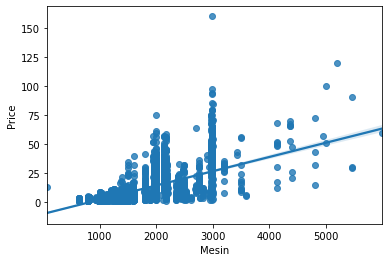

In [8]:
sns.regplot(x="Mesin", y="Price", data=df)

In [ ]:
df.corr()['Price']

In [ ]:

df = df[df['Power'].notnull()]
df.info()

In [5]:
stringPow = df['Power'].astype(str)
tenaga = stringPow.str.split(' ')
df['Tenaga'] = tenaga.apply(lambda x:x[0])
df['Tenaga']= pd.to_numeric(df['Tenaga'], errors='coerce')
df.head()

,Name,Location,Year,Kilometers_Driven,Fuel_Type,Transmission,Owner_Type,Mileage,Engine,Power,Seats,Price,Brand,konsumsiBensin,Mesin,Tenaga
0,Maruti Wagon R LXI CNG,Mumbai,2010,72000,CNG,Manual,First,26.6 km/kg,998 CC,58.16 bhp,5.0,1.75,MARUTI,26.60,998.0,58.16
1,Hyundai Creta 1.6 CRDi SX Option,Pune,2015,41000,Diesel,Manual,First,19.67 kmpl,1582 CC,126.2 bhp,5.0,12.50,HYUNDAI,19.67,1582.0,126.20
2,Honda Jazz V,Chennai,2011,46000,Petrol,Manual,First,18.2 kmpl,1199 CC,88.7 bhp,5.0,4.50,HONDA,18.20,1199.0,88.70
3,Maruti Ertiga VDI,Chennai,2012,87000,Diesel,Manual,First,20.77 kmpl,1248 CC,88.76 bhp,7.0,6.00,MARUTI,20.77,1248.0,88.76
4,Audi A4 New 2.0 TDI Multitronic,Coimbatore,2013,40670,Diesel,Automatic,Second,15.2 kmpl,1968 CC,140.8 bhp,5.0,17.74,AUDI,15.20,1968.0,140.80


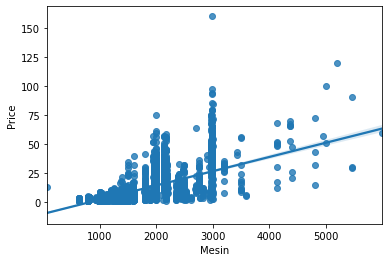

In [9]:
sns.regplot(x='Mesin',y='Price',data=df)

In [6]:
df.corr()['Price']

Year                 0.305327
Kilometers_Driven   -0.011493
Seats                0.052225
Price                1.000000
konsumsiBensin      -0.306593
Mesin                0.658354
Tenaga               0.772566
Name: Price, dtype: float64

In [ ]:
df.corr()

In [ ]:
df.head()

In [ ]:
grupOwner = df.groupby('Owner_Type').mean()
grupOwner['Price'].sort_values(ascending=False)

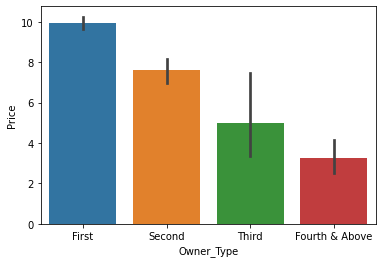

In [22]:
sns.barplot(x=df['Owner_Type'],y=df['Price'],order=['First','Second','Third','Fourth & Above'])

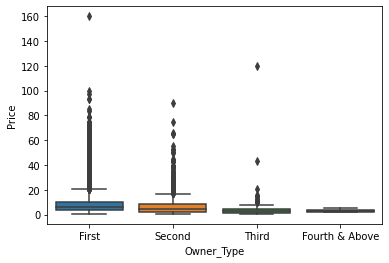

In [21]:
sns.boxplot(x=df['Owner_Type'],y=df['Price'],order=['First','Second','Third','Fourth & Above'])

In [ ]:
plt.bar(x=df['Owner_Type'],height=df['Price'])

In [ ]:
jenis = df['Owner_Type'].value_counts()
jenis

In [ ]:
sns.regplot(x=df['konsumsiBensin'],y=df['Kilometers_Driven'],data=df)

In [ ]:
sns.lineplot(x=df['konsumsiBensin'],y=df['Kilometers_Driven'],data=df)

In [ ]:
df.corr()

In [ ]:
df.head()

In [ ]:
pertama = df[df['Owner_Type']=='First']
pertama.head()

In [ ]:
pertama['Kilometers_Driven'].mean()

In [24]:
df.head()

,Name,Location,Year,Kilometers_Driven,Fuel_Type,Transmission,Owner_Type,Mileage,Engine,Power,Seats,Price,Brand,konsumsiBensin,Mesin,Tenaga
0,Maruti Wagon R LXI CNG,Mumbai,2010,72000,CNG,Manual,First,26.6 km/kg,998 CC,58.16 bhp,5.0,1.75,MARUTI,26.60,998.0,58.16
1,Hyundai Creta 1.6 CRDi SX Option,Pune,2015,41000,Diesel,Manual,First,19.67 kmpl,1582 CC,126.2 bhp,5.0,12.50,HYUNDAI,19.67,1582.0,126.20
2,Honda Jazz V,Chennai,2011,46000,Petrol,Manual,First,18.2 kmpl,1199 CC,88.7 bhp,5.0,4.50,HONDA,18.20,1199.0,88.70
3,Maruti Ertiga VDI,Chennai,2012,87000,Diesel,Manual,First,20.77 kmpl,1248 CC,88.76 bhp,7.0,6.00,MARUTI,20.77,1248.0,88.76
4,Audi A4 New 2.0 TDI Multitronic,Coimbatore,2013,40670,Diesel,Automatic,Second,15.2 kmpl,1968 CC,140.8 bhp,5.0,17.74,AUDI,15.20,1968.0,140.80


(array([ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15, 16,
        17, 18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29]),
 <a list of 30 Text major ticklabel objects>)

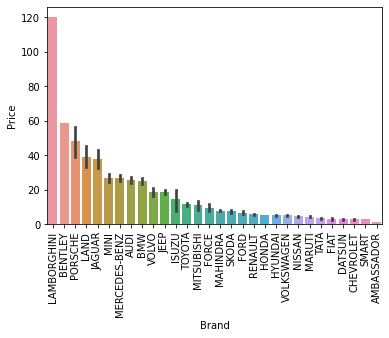

In [26]:
grupMerk = df.groupby('Brand').mean()
hargaMerk = grupMerk['Price'].sort_values(ascending=False)
#hargaLokasi.index
sns.barplot(x='Brand',y='Price',data=df,order=hargaMerk.index)
plt.xticks(rotation=90)

In [10]:
df.head()

,Name,Location,Year,Kilometers_Driven,Fuel_Type,Transmission,Owner_Type,Mileage,Engine,Power,Seats,Price,Brand,konsumsiBensin,Mesin,Tenaga
0,Maruti Wagon R LXI CNG,Mumbai,2010,72000,CNG,Manual,First,26.6 km/kg,998 CC,58.16 bhp,5.0,1.75,MARUTI,26.60,998.0,58.16
1,Hyundai Creta 1.6 CRDi SX Option,Pune,2015,41000,Diesel,Manual,First,19.67 kmpl,1582 CC,126.2 bhp,5.0,12.50,HYUNDAI,19.67,1582.0,126.20
2,Honda Jazz V,Chennai,2011,46000,Petrol,Manual,First,18.2 kmpl,1199 CC,88.7 bhp,5.0,4.50,HONDA,18.20,1199.0,88.70
3,Maruti Ertiga VDI,Chennai,2012,87000,Diesel,Manual,First,20.77 kmpl,1248 CC,88.76 bhp,7.0,6.00,MARUTI,20.77,1248.0,88.76
4,Audi A4 New 2.0 TDI Multitronic,Coimbatore,2013,40670,Diesel,Automatic,Second,15.2 kmpl,1968 CC,140.8 bhp,5.0,17.74,AUDI,15.20,1968.0,140.80


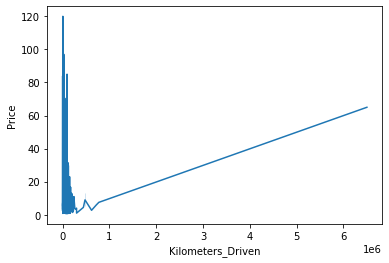

In [12]:
sns.lineplot(x='Kilometers_Driven',y='Price',data=df)

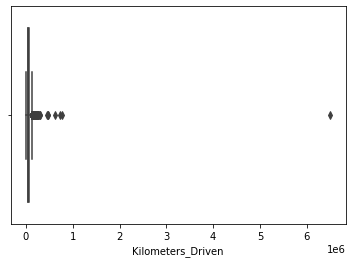

In [13]:
sns.boxplot(x='Kilometers_Driven',data=df)

In [14]:
test = df[df['Kilometers_Driven']>4000000]
test

,Name,Location,Year,Kilometers_Driven,Fuel_Type,Transmission,Owner_Type,Mileage,Engine,Power,Seats,Price,Brand,konsumsiBensin,Mesin,Tenaga
2328,BMW X5 xDrive 30d M Sport,Chennai,2017,6500000,Diesel,Automatic,First,15.97 kmpl,2993 CC,258 bhp,5.0,65.0,BMW,15.97,2993.0,258.0


In [15]:
outlier = df['Kilometers_Driven'].max()
#print(outlier)
drop = df[df['Kilometers_Driven']==outlier]
df1 = df.drop(drop.index)

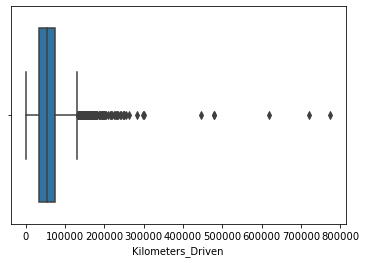

In [16]:
sns.boxplot(x='Kilometers_Driven',data=df1)

In [19]:
outlier2=df1[df1['Kilometers_Driven']>300000]
outlier2

,Name,Location,Year,Kilometers_Driven,Fuel_Type,Transmission,Owner_Type,Mileage,Engine,Power,Seats,Price,Brand,konsumsiBensin,Mesin,Tenaga
340,Skoda Octavia Ambition Plus 2.0 TDI AT,Kolkata,2013,775000,Diesel,Automatic,First,19.3 kmpl,1968 CC,141 bhp,5.0,7.50,SKODA,19.30,1968.0,141.00
358,Hyundai i10 Magna 1.2,Chennai,2009,620000,Petrol,Manual,First,20.36 kmpl,1197 CC,78.9 bhp,5.0,2.70,HYUNDAI,20.36,1197.0,78.90
1860,Volkswagen Vento Diesel Highline,Chennai,2013,720000,Diesel,Manual,First,20.54 kmpl,1598 CC,103.6 bhp,5.0,5.90,VOLKSWAGEN,20.54,1598.0,103.60
2823,Volkswagen Jetta 2013-2015 2.0L TDI Highline AT,Chennai,2015,480000,Diesel,Automatic,First,16.96 kmpl,1968 CC,138.03 bhp,5.0,13.00,VOLKSWAGEN,16.96,1968.0,138.03
3092,Honda City i VTEC SV,Kolkata,2015,480000,Petrol,Manual,First,17.4 kmpl,1497 CC,117.3 bhp,5.0,5.00,HONDA,17.40,1497.0,117.30
4491,Hyundai i20 Magna Optional 1.2,Bangalore,2013,445000,Petrol,Manual,First,18.5 kmpl,1197 CC,82.9 bhp,5.0,4.45,HYUNDAI,18.50,1197.0,82.90


# Filter

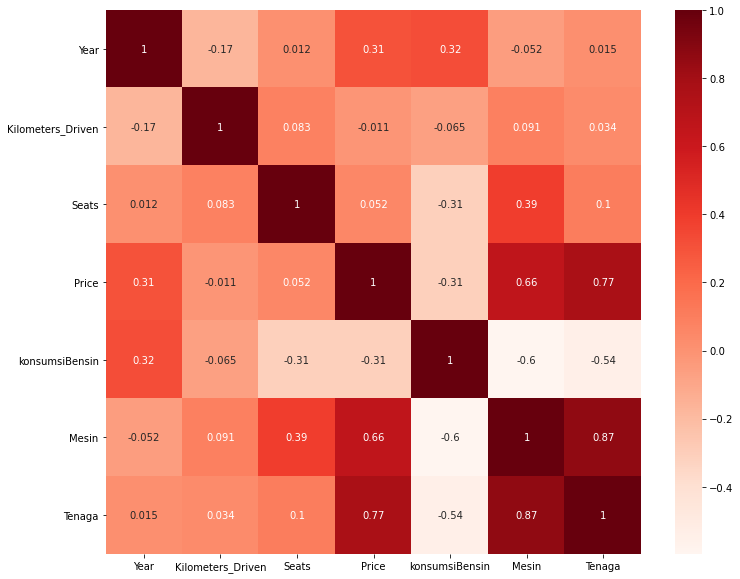

In [9]:
#Using Pearson Correlation
plt.figure(figsize=(12,10))
cor = df.corr()

sns.heatmap(cor, annot=True, cmap=plt.cm.Reds)
plt.show()

In [27]:
#Correlation with output variable
cor_target = abs(cor["Price"])
#Selecting highly correlated features
relevant_features = cor_target[cor_target>0.5]
relevant_features

Price     1.000000
Mesin     0.658354
Tenaga    0.772566
Name: Price, dtype: float64

# Embedded

In [ ]:
reg = LassoCV()
df=df.dropna(axis=0)
X = df.loc[:,['Year','Kilometers_Driven','Mesin','Tenaga','konsumsiBensin','Seats']]
y=df['Price']
reg.fit(X, y)
print("Best alpha using built-in LassoCV: %f" % reg.alpha_)
print("Best score using built-in LassoCV: %f" %reg.score(X,y))
coef = pd.Series(reg.coef_, index = X.columns)

In [ ]:
print("Lasso picked " + str(sum(coef != 0)) + 
      " variables and eliminated the other " +  
      str(sum(coef == 0)) + " variables")

In [ ]:
imp_coef = coef.sort_values()
import matplotlib
matplotlib.rcParams['figure.figsize'] = (8.0, 10.0)
imp_coef.plot(kind = "barh")
plt.title("Feature importance using Lasso Model")

# Wrapper

In [ ]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.feature_selection import RFE
from sklearn.linear_model import RidgeCV, LassoCV, Ridge, Lasso

df = df.dropna(axis=0)
X =df.loc[:,['Year', 'Kilometers_Driven', 'Seats', 'konsumsiBensin', 'Mesin', 'Tenaga']]   #Feature Matrix
y = df['Price']          #Target Variable
print(X.shape)
print(y.shape)
print(len(X))

In [ ]:
model = LinearRegression()
#Initializing RFE model
rfe = RFE(model, 6)
#Transforming data using RFE
X_rfe = rfe.fit_transform(X,y)  
#Fitting the data to model
model.fit(X_rfe,y)
print(rfe.support_)
print(rfe.ranking_)

In [6]:
df.info(
)

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6019 entries, 0 to 6018
Data columns (total 16 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   Name               6019 non-null   object 
 1   Location           6019 non-null   object 
 2   Year               6019 non-null   int64  
 3   Kilometers_Driven  6019 non-null   int64  
 4   Fuel_Type          6019 non-null   object 
 5   Transmission       6019 non-null   object 
 6   Owner_Type         6019 non-null   object 
 7   Mileage            6017 non-null   object 
 8   Engine             5983 non-null   object 
 9   Power              5983 non-null   object 
 10  Seats              5977 non-null   float64
 11  Price              6019 non-null   float64
 12  Brand              6019 non-null   object 
 13  konsumsiBensin     6017 non-null   float64
 14  Mesin              5983 non-null   float64
 15  Tenaga             5876 non-null   float64
dtypes: float64(5), int64(2),

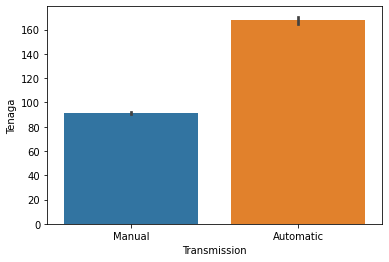

In [13]:
df3 = df.dropna(axis=0)
sns.barplot(x='Transmission',y='Tenaga',data=df3)
#plt.xticks(rotation=90)

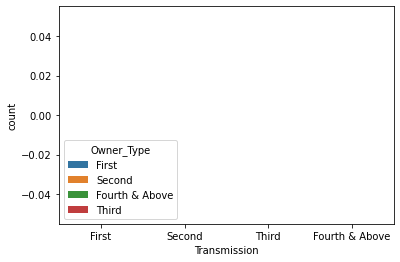

In [17]:
sns.countplot(x='Transmission',hue='Owner_Type',data=df,order=['First','Second','Third','Fourth & Above'])

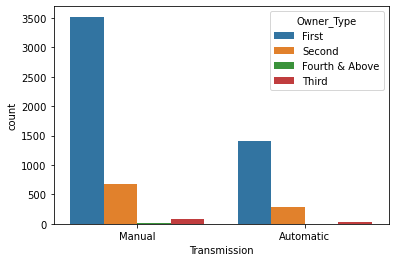

In [28]:
sns.countplot(x='Transmission',hue='Owner_Type',data=df)

In [26]:
df['Owner_Type'].unique()

array(['First', 'Second', 'Fourth & Above', 'Third'], dtype=object)

In [31]:
test = df[df['Owner_Type']=='Fourth & Above']
test['Owner_Type'].value_counts()

Fourth & Above    9
Name: Owner_Type, dtype: int64

In [33]:
dfdf = df.copy()
def ubah(arr):
    if arr == 'First':
        return 1
    elif arr =='Second':
        return 2
    elif arr=='Third':
        return 3
    else:
        return 4
dfdf['Kepemilikan'] = dfdf['Owner_Type'].apply(ubah)
dfdf.head()

,Name,Location,Year,Kilometers_Driven,Fuel_Type,Transmission,Owner_Type,Mileage,Engine,Power,Seats,Price,Brand,konsumsiBensin,Mesin,Tenaga,Kepemilikan
0,Maruti Wagon R LXI CNG,Mumbai,2010,72000,CNG,Manual,First,26.6 km/kg,998 CC,58.16 bhp,5.0,1.75,MARUTI,26.60,998.0,58.16,1
1,Hyundai Creta 1.6 CRDi SX Option,Pune,2015,41000,Diesel,Manual,First,19.67 kmpl,1582 CC,126.2 bhp,5.0,12.50,HYUNDAI,19.67,1582.0,126.20,1
2,Honda Jazz V,Chennai,2011,46000,Petrol,Manual,First,18.2 kmpl,1199 CC,88.7 bhp,5.0,4.50,HONDA,18.20,1199.0,88.70,1
3,Maruti Ertiga VDI,Chennai,2012,87000,Diesel,Manual,First,20.77 kmpl,1248 CC,88.76 bhp,7.0,6.00,MARUTI,20.77,1248.0,88.76,1
4,Audi A4 New 2.0 TDI Multitronic,Coimbatore,2013,40670,Diesel,Automatic,Second,15.2 kmpl,1968 CC,140.8 bhp,5.0,17.74,AUDI,15.20,1968.0,140.80,2


In [34]:
dfdf.corr()

,Year,Kilometers_Driven,Seats,Price,konsumsiBensin,Mesin,Tenaga,Kepemilikan
Year,1.000000,-0.173048,0.012333,0.305327,0.321565,-0.052197,0.014525,-0.397152
Kilometers_Driven,-0.173048,1.000000,0.083113,-0.011493,-0.065253,0.091068,0.033503,0.085337
Seats,0.012333,0.083113,1.000000,0.052225,-0.308226,0.393337,0.101562,0.014052
Price,0.305327,-0.011493,0.052225,1.000000,-0.306593,0.658354,0.772566,-0.097557
konsumsiBensin,0.321565,-0.065253,-0.308226,-0.306593,1.000000,-0.597699,-0.537729,-0.161181
Mesin,-0.052197,0.091068,0.393337,0.658354,-0.597699,1.000000,0.866185,0.050907
Tenaga,0.014525,0.033503,0.101562,0.772566,-0.537729,0.866185,1.000000,0.026088
Kepemilikan,-0.397152,0.085337,0.014052,-0.097557,-0.161181,0.050907,0.026088,1.000000


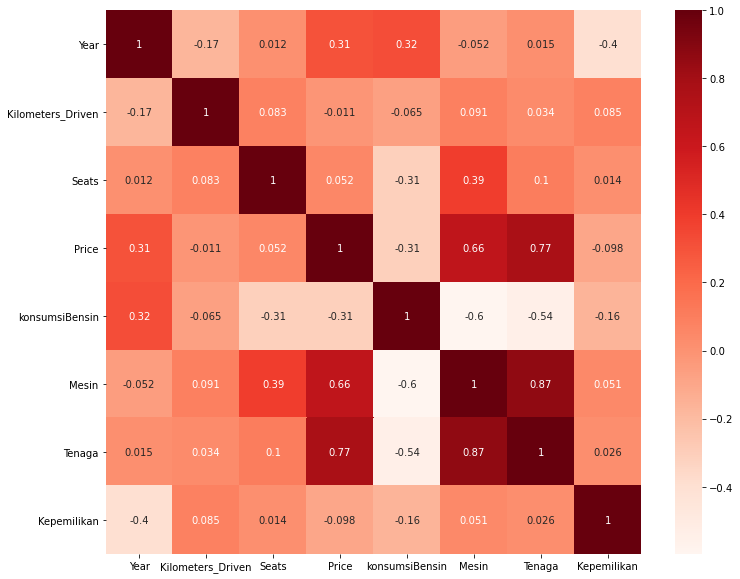

In [35]:
plt.figure(figsize=(12,10))
corr = dfdf.corr()

sns.heatmap(corr, annot=True, cmap=plt.cm.Reds)
plt.show()

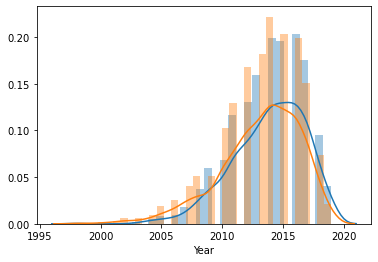

In [49]:
dfa=df[df['Transmission']=='Automatic']
dfm=df[df['Transmission']=='Manual']
sns.distplot(a=dfa['Year'])
sns.distplot(a=dfm['Year'])

In [50]:
arr1=dfa['Year'].value_counts().sort_index()

In [48]:
arr2= dfm['Year'].value_counts().sort_index()

In [52]:
array = arr2-arr1
array

1998      2.0
1999      NaN
2000      NaN
2001      NaN
2002      NaN
2003     13.0
2004     19.0
2005     39.0
2006     56.0
2007     85.0
2008     90.0
2009     64.0
2010    188.0
2011    202.0
2012    286.0
2013    289.0
2014    347.0
2015    302.0
2016    283.0
2017    191.0
2018     84.0
2019     10.0
Name: Year, dtype: float64

In [56]:
array.index

Int64Index([1998, 1999, 2000, 2001, 2002, 2003, 2004, 2005, 2006, 2007, 2008,
            2009, 2010, 2011, 2012, 2013, 2014, 2015, 2016, 2017, 2018, 2019],
           dtype='int64')

(array([ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15, 16,
        17, 18, 19, 20, 21]),
 <a list of 22 Text major ticklabel objects>)

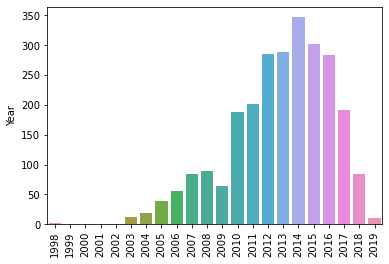

In [59]:
sns.barplot(x=array.index,y=array)
plt.xticks(rotation=90)